=============SIMULATION 1 =============


  Start computing Random Field

---- Statistics random field ---
CorrLengths: (0.2 0.2 0.1)
Mean: -2.47921e-17
Var: 1
--------------------------------


---- Statistics random field ---
CorrLengths: (0.2 0.2 0.1)
Mean: -2.93204e-17
Var: 1
--------------------------------

field values: 4(1e-10 1e-09 1e-08 1e-07)
volumes: 4(0.315934 0.277609 0.182495 0.223963)
thresholds on GRF1: 1(0)
thresholds on GRF2: 1(0.2)

---- Statistics random field ---
CorrLengths: (0.2 0.2 0.1)
Mean: 2.45304e-08
Var: 1.65641e-15
--------------------------------


---- Statistics log of random field ---
Péclet: 
  Macro = (102756.80 -1093.71 670.36) 
  Meso = (10275.68 -218.74 67.04) 

CorrLengths: (0.2 0.2 0.1)
Mean: -19.9991
Var: 6.86796
------------------------------------

Writing the Random Field
=============SIMULATION 2 =============


  Start computing Random Field

---- Statistics random field ---
CorrLengths: (0.2 0.2 0.1)
Mean: -2.76397e-18
Var: 1
-----------

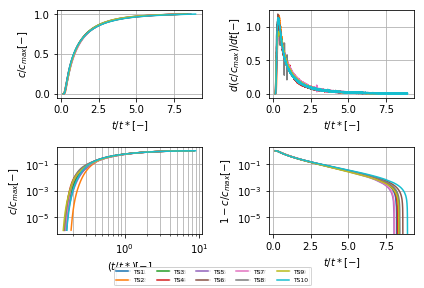

In [2]:
import numpy as np
from numpy import diff
import matplotlib.pyplot as plt
import os
import re
fig, axs = plt.subplots(2, 2)
for i in range(1, 11):
    os.chdir('TS%d' % i)
    dd = []
    cl = []
    mass = []
    mvel = []
    conc = []
    time = []
    with open("log") as log:
        for _ in range(225): # It skips the first 225 to avoid some misleading "Time =" occurencies
            next(log)
        for line in log: # It greps all the relevant data from the log file
            if "Total mass =" in line:
                mass.append(float(line.split()[3]))
            if "Mean vel =" in line:
                mvel.append([float(i) for i in re.split(' |\(|\)', line)[slice(4, 7)]])
            if "Flux out =" in line:
                conc.append(float(line.split()[3]))
            if "Time =" in line:
                time.append(float(line.split()[2]))
    cBoolean = np.logical_and(np.array(conc)>1e-6, np.array(conc)<1) 
    c = [val for i, val in enumerate(conc) if cBoolean[i]]
    Cmax = max(c)
    Cnorm = [x/Cmax for x in c]
    Tadv = 2/mvel[0][0]
    t = [val/Tadv for i, val in enumerate(time) if cBoolean[i]]
    dC = diff(Cnorm)/diff(t) 
    axs[0, 0].plot(t, Cnorm)
    axs[0, 0].set_xlabel('$t/t* [-]$')
    axs[0, 0].set_ylabel('$c/c_{max} [-]$')
    axs[0, 1].plot(t[1:], [val for i, val in enumerate(dC)])
    axs[0, 1].set_xlabel('$t/t* [-]$')
    axs[0, 1].set_ylabel('$d(c/c_{max})/dt [-]$')
    axs[1, 0].loglog(t, [val for i, val in enumerate(Cnorm)])
    axs[1, 0].set_xlabel('$(t/t*) [-]$')
    axs[1, 0].set_ylabel('$c/c_{max} [-]$')
    axs[1, 1].semilogy(t, [1-val for i, val in enumerate(Cnorm)], label='TS%d' % i)
    axs[1, 1].set_xlabel('$t/t* [-]$')
    axs[1, 1].set_ylabel('$1-c/c_{max} [-]$')
    handles, labels = axs[1, 1].get_legend_handles_labels()
    fig.legend(handles, labels, loc = 'lower center', ncol=5, prop={'size': 6})
    with open("log") as stats: # It re-opens the log file to print the field statistics 
        for line in stats:
            if "boundingBox:" in line:
                dd.append([float(i) for i in re.split(' |\(|\)', line)[slice(9, 12)]])
            if "Start computing" in line:
                print("=============SIMULATION %d =============\n\n" % i)
                while set(line.split()).isdisjoint(set(["End"])):
                    if "Statistics log" in line:
                        print(line, end = ''),
                        line = stats.readline()
                        cl.append([float(i) for i in re.split(' |\(|\)', line)[slice(2, 5)]])            
                        macroPeX = dd[0][0]*mvel[0][0]/1e-10
                        macroPeY = dd[0][1]*mvel[0][1]/1e-10
                        macroPeZ = dd[0][2]*mvel[0][2]/1e-10
                        medPeX = cl[0][0]*mvel[0][0]/1e-10
                        medPeY = cl[0][1]*mvel[0][1]/1e-10
                        medPeZ = cl[0][2]*mvel[0][2]/1e-10
                        print("Péclet: \n  Macro = (%.2f %.2f %.2f) \n  Meso = (%.2f %.2f %.2f) \n" % (macroPeX, macroPeY, macroPeZ, medPeX, medPeY, medPeZ))                
                    print(line, end = '')
                    line = stats.readline()
    os.chdir('..')
axs[0, 0].grid()
axs[0, 1].grid()
axs[1, 0].grid(True, which="both")
axs[1, 1].grid()
plt.tight_layout()
fig.savefig("multiSimPlot.pdf")
plt.show()